# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

import sys
epsilon = sys.float_info.epsilon

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

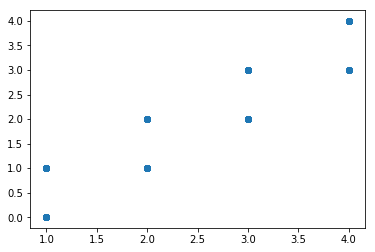

In [67]:
import random
samples = 100
conditions = 4
x_vals = np.zeros(samples)
y_vals = np.zeros(samples)
for i in range(samples):
    x_vals[i] = random.randint(1, conditions)
    y_vals[i] = round(random.randrange(x_vals[i]-1, x_vals[i], 1) + random.random(), 0)

plt.scatter(x_vals, y_vals)

## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [14]:
def entropy(x):
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px + epsilon) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

In [36]:
def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """

    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / len(y)

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y + epsilon) ))                               # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

In [69]:
entropy_x = entropy(x_vals)
print(entropy_x)

entropy_x_y = condEntropy(x_vals, y_vals)
print(entropy_x_y)

MI = entropy_x - entropy_x_y
print(MI)

1.9752236776176522
0.6340148308570793
1.3412088467605727


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

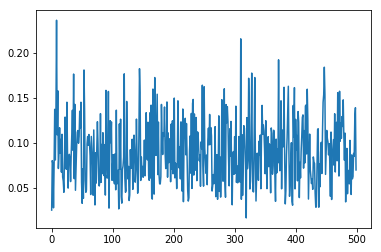

In [70]:
iters = 500
mi_vals = np.zeros(iters)

#print(x_vals)
#print(y_vals)

for i in range(iters):
    np.random.shuffle(x_vals)
    mi_tmp = entropy(x_vals) - condEntropy(x_vals, y_vals)
    mi_vals[i] = mi_tmp

plt.plot(mi_vals)

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [71]:
mean_mi = np.mean(mi_vals)
#print(mean_mi)

MI_corrected = MI - mean_mi
print(MI_corrected)

1.251505407048034
